## Data Validation

The **Food Claims** dataset contains **98 Rows** and **8 Columns**. Several data cleaning and validation steps were taken and are described below:

1. All the columns are checked using .dtypes to validate if correct datatypes are assigned to them and found out that **Claim Amount** was incorrectly assigned as the currency was represented as brazil dollar.
2. The **Claim Amount** column was cleaned to have numerical values and assigned to **float64** datatype.
3. The **Claim ID** is found to have unecessary 0's, they were removed using **str** function to exclude those zeros.
4. The **Time to Close** columns were converted from days to years by dividing it by 365 and rounding it up to one decimal.
5. The **Location** column is capitialised from being uppercase using **str.capitalize()** function.
6. All the columns of the dataframe are checked for null values and the **Cause** column is found to have 78 missing values, the null values are replaced by unknown and the entire column is capitalized.
7. Finally, the **claims** dataset is checked for duplicates, it is found that the data set is duplicate free.

All the other columns are as expected according to the data description.



In [65]:
# Import all necessary packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.graph_objects as go 
import plotly.express as px


In [66]:
# read the csv file to a dataframe using pandas

claims = pd.read_csv("claims.csv",sep = ',')
claims

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
0,0000000-00.2010.0.00.0094,2082,"R$50,000.00",34297.47,RECIFE,2,False,NaN
1,0000000-00.2011.0.00.0086,3591,"R$180,000.00",56383.54,SAO LUIS,7,False,NaN
2,0000000-00.2012.0.00.0092,2997,"R$70,000.00",12366.76,SAO LUIS,3,False,vegetables
3,0000000-00.2013.0.00.0096,1143,"R$95,104.00",29217.16,FORTALEZA,4,False,NaN
4,0000000-00.2014.0.00.0097,117,"R$29,000.00",12610.50,FORTALEZA,1,False,meat
...,...,...,...,...,...,...,...,...
93,0000000-00.2020.0.00.0023,208,"R$80,396.00",40668.14,FORTALEZA,3,False,meat
94,0000000-00.2020.0.00.0057,86,"R$50,000.00",8363.96,FORTALEZA,2,False,NaN
95,0000000-00.2020.0.00.0010,201,"R$60,000.00",42318.80,NATAL,2,False,NaN
96,0000000-00.2020.0.00.0059,200,"R$474,542.00",329473.49,NATAL,20,True,NaN


In [67]:
# Verifying datatypes

claims.dtypes

Claim ID                 object
Time to Close             int64
Claim Amount             object
Amount Paid             float64
Location                 object
Individuals on Claim      int64
Linked Cases               bool
Cause                    object
dtype: object

In [68]:
claims["Claim Amount"] = claims["Claim Amount"].replace("[R$,]", "", regex=True).astype(float)
claims["Claim ID"] = claims["Claim ID"].str[11:]
claims["Time to Close"] = round(claims["Time to Close"]/365,1)
claims["Location"] = claims["Location"].str.capitalize()

In [69]:
claims.dtypes

Claim ID                 object
Time to Close           float64
Claim Amount            float64
Amount Paid             float64
Location                 object
Individuals on Claim      int64
Linked Cases               bool
Cause                    object
dtype: object

In [70]:
# Checking for null values

claims.isnull().any()

Claim ID                False
Time to Close           False
Claim Amount            False
Amount Paid             False
Location                False
Individuals on Claim    False
Linked Cases            False
Cause                    True
dtype: bool

In [71]:
for col in claims.columns:
    miss = claims[col].isnull().sum()
    if miss>0:
        print("{} has {} missing value(s)".format(col,miss))
    else:
        print("{} has NO missing value!".format(col))

Claim ID has NO missing value!
Time to Close has NO missing value!
Claim Amount has NO missing value!
Amount Paid has NO missing value!
Location has NO missing value!
Individuals on Claim has NO missing value!
Linked Cases has NO missing value!
Cause has 78 missing value(s)


In [72]:
claims["Cause"] = claims["Cause"].fillna("unknown")
claims["Cause"] = claims["Cause"].str.capitalize()

In [73]:
duplicate = claims[claims.duplicated()]
duplicate

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause


## Data Discovery and Visualization






In [74]:
claims

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
0,2010.0.00.0094,5.7,50000.0,34297.47,Recife,2,False,Unknown
1,2011.0.00.0086,9.8,180000.0,56383.54,Sao luis,7,False,Unknown
2,2012.0.00.0092,8.2,70000.0,12366.76,Sao luis,3,False,Vegetables
3,2013.0.00.0096,3.1,95104.0,29217.16,Fortaleza,4,False,Unknown
4,2014.0.00.0097,0.3,29000.0,12610.50,Fortaleza,1,False,Meat
...,...,...,...,...,...,...,...,...
93,2020.0.00.0023,0.6,80396.0,40668.14,Fortaleza,3,False,Meat
94,2020.0.00.0057,0.2,50000.0,8363.96,Fortaleza,2,False,Unknown
95,2020.0.00.0010,0.6,60000.0,42318.80,Natal,2,False,Unknown
96,2020.0.00.0059,0.5,474542.0,329473.49,Natal,20,True,Unknown


In [75]:
count_per_location = claims.groupby(['Location'])['Location'].count()
count_per_location = pd.DataFrame(count_per_location)
count_per_location.rename(columns = {'Claim ID':'Number of claims'}, inplace = True)
count_per_location                                     

,Location
Location,
Fortaleza,22
Natal,21
Recife,25
Sao luis,30


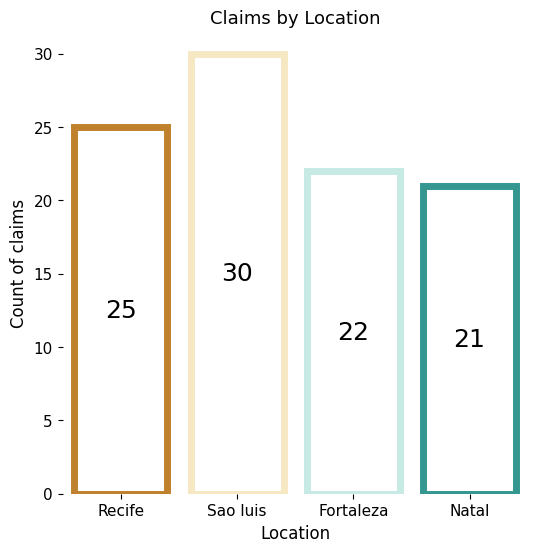

In [76]:
f, ax = plt.subplots(figsize=(6,6))
sns.countplot(x ='Location', data = claims,color="salmon", facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("BrBG", 4))
ax.grid(False)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Count of claims', fontsize=12)
plt.title('Claims by Location', fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=11)
sns.despine(left=True, bottom=True)
ax.bar_label(ax.containers[0], label_type='center',fontsize=18)
plt.show()

##**How does the number of claims differ across locations?**

Vivendo being a fast food chain in Brazil with over 200 outlets and as with many fast food
establishments, customers make claims against the company for food poisoning, Their legal team is split into four locations which are **Recife**, **Sao luis**, **Fortaleza** & **Natal**

The above plot shows the number of claims per location,a countplot was used as it clearly visualizes univariate data, which suggests that the average number of claims is 24.5, with Sao Luis having the most, at 30. Unknown causes of food claims account for the majority of claims in each country; however, not all locations have food poisoning as a cause. This implies that meat and unknown causes are the primary causes of food poisoning.


In [77]:
stack_bar = claims.groupby(['Location','Cause']).size().reset_index().pivot(columns='Cause', index='Location', values=0)

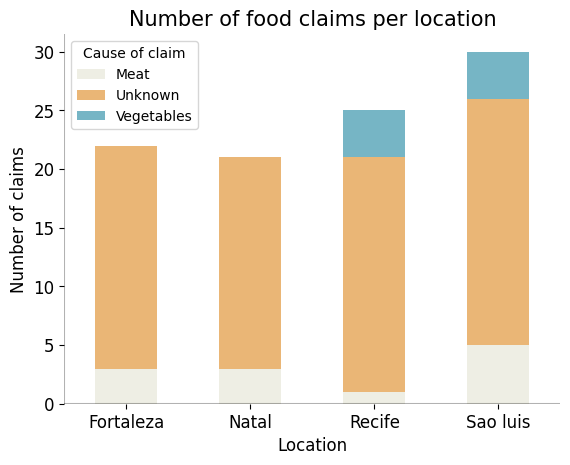

In [78]:
# Horizontal Barplot to vizualize number of claims per location
stack_bar.plot(kind='bar', stacked=True, color=["#eeeee4", "#eab676", "#76b5c5"])
plt.ylabel('Number of claims', fontsize=12);
plt.xlabel('Location', fontsize=12);
plt.title('Number of food claims per location', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(rotation = 0)
plt.legend(title='Cause of claim', loc='upper left')
plt.grid(False)
plt.axhline(0,color="black",alpha=0.3)
plt.axvline(-0.5,color = "black",alpha=0.3)
sns.despine(left=True, bottom=True)

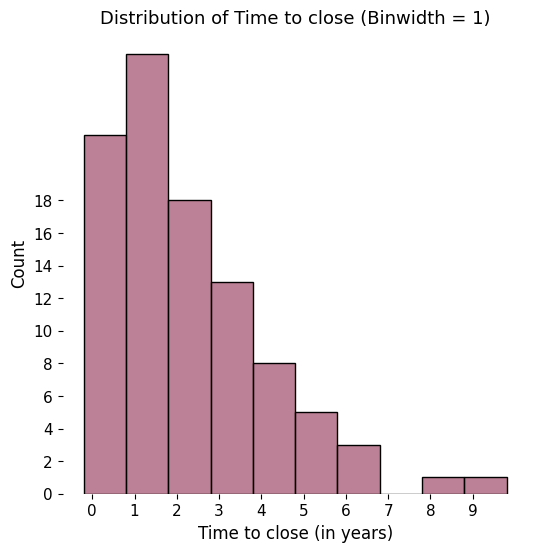

In [79]:
# Histogram for distribution of time to close
f, ax = plt.subplots(figsize=(6,6))
sns.histplot(data=claims, x="Time to Close",color="#a65773",binwidth=1)
ax.grid(False)
plt.xlabel('Time to close (in years)', fontsize=12)
plt.ylabel('Count', fontsize=12)
ax.set_xticks(range(0,10,1))
ax.set_yticks(range(0,20,2))
plt.title('Distribution of Time to close (Binwidth = 1)', fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=11)
sns.despine(left=True, bottom=True)

## **What is the distribution of time to close claims?**

A histogram is used as it is known to be the best to visualise distribution of a variable. According to the above histogram, the **Time to Close** looks to be a right-skewed distribution, implying that the number of claims is inversely related to the time to close (in years) and claims that take 1 to 2 years to settle have the most claims.

In [80]:
# plotting Average time to close by country using a boxplot

y = claims['Time to Close']
config = {'displaylogo': False, 'displayModeBar': False}
fig = go.Figure()
fig.add_trace(go.Box(
    x=claims['Location'],
    y=y,line=dict(color='#638677'), fillcolor= "#b6dcd7",boxmean = True 
))
fig.update_layout(
    yaxis=dict(title='Time to close a food claim (in years)', zeroline=True),
    xaxis=dict(title='Location', zeroline=True),
    boxmode='group',
    width =  950,
    height = 950,
    margin_pad = 1,
    hoverlabel_align="left",
	paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='white',
    hoverlabel=dict(
        bgcolor = "white",
        font = dict(
            color = "Dark Grey",
            family = "Courier New",
            )    
    )

    
    
)
fig.update_traces(orientation='v')
fig.show(config=config)

## **How does the average time to close claims differ by location?**

Finally, As the new head of the legal department wanted to compare the time it takes to close claims across locations, a multiple boxplot was used to visualise the average time to close a claim by location as boxplots provide an high level information such as mean, median & IQR (Inter Quartile Range). Which shows that Sao Luis has the longest average time to close of all and Natal has the shortest. When looking at average time to close values in Fortaleza and Natal, we will consider the median rather than the mean because both have outliers that cause the means to skew. According to our data, the legal team at Sao Luis takes longer than any other legal team to close a claim. 